# Data Preprocessing 

## Importing the libraries

In [250]:
# Install numpy if not available
!pip install numpy

import numpy as np
# Install matplotlib if not available
!pip install matplotlib

import matplotlib.pyplot as plt
# Install pandas if not available
!pip install pandas

import pandas as pd
# Install scikit-learn if not available
!pip install scikit-learn

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
# Install seaborn if not available
!pip install seaborn

import seaborn as sns

## Importing the dataset

In [251]:
dataset = pd.read_csv("column_3C_weka.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [252]:
print(X)


[[ 63.0278175   22.55258597  39.60911701  40.47523153  98.67291675
   -0.25439999]
 [ 39.05695098  10.06099147  25.01537822  28.99595951 114.4054254
    4.56425864]
 [ 68.83202098  22.21848205  50.09219357  46.61353893 105.9851355
   -3.53031731]
 ...
 [ 61.44659663  22.6949683   46.17034732  38.75162833 125.6707246
   -2.70787952]
 [ 45.25279209   8.69315736  41.5831264   36.55963472 118.5458418
    0.21475017]
 [ 33.84164075   5.07399141  36.64123294  28.76764934 123.9452436
   -0.19924909]]


In [253]:
print(y)

['Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spo

## Taking care of missing data

In [254]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 0:6])  # Fit on all columns that need imputation
X[:, 0:6] = imputer.transform(X[:, 0:6])

In [255]:
print(X)

[[ 63.0278175   22.55258597  39.60911701  40.47523153  98.67291675
   -0.25439999]
 [ 39.05695098  10.06099147  25.01537822  28.99595951 114.4054254
    4.56425864]
 [ 68.83202098  22.21848205  50.09219357  46.61353893 105.9851355
   -3.53031731]
 ...
 [ 61.44659663  22.6949683   46.17034732  38.75162833 125.6707246
   -2.70787952]
 [ 45.25279209   8.69315736  41.5831264   36.55963472 118.5458418
    0.21475017]
 [ 33.84164075   5.07399141  36.64123294  28.76764934 123.9452436
   -0.19924909]]


In [256]:
# Check for sparsity or near-zero values in features
df = pd.DataFrame(X, columns=dataset.columns[:-1])
for col in df.columns:
    print(f"Value counts for {col} (showing up to 10 most common values):")
    print(df[col].value_counts().head(10))
    num_zeros = (df[col] == 0).sum()
    print(f"Number of zeros: {num_zeros} ({num_zeros/len(df)*100:.1f}% of samples)")
    print('-'*40)

Value counts for pelvic_incidence (showing up to 10 most common values):
pelvic_incidence
63.027817    1
56.535051    1
54.920858    1
38.505273    1
48.259920    1
87.679087    1
74.094731    1
95.480229    1
80.111572    1
73.635962    1
Name: count, dtype: int64
Number of zeros: 0 (0.0% of samples)
----------------------------------------
Value counts for pelvic_tilt (showing up to 10 most common values):
pelvic_tilt
22.552586    1
14.377189    1
18.968430    1
16.964297    1
16.417462    1
20.365613    1
18.823727    1
46.550053    1
33.942432    1
9.711318     1
Name: count, dtype: int64
Number of zeros: 0 (0.0% of samples)
----------------------------------------
Value counts for lumbar_lordosis_angle (showing up to 10 most common values):
lumbar_lordosis_angle
52.0    4
42.0    4
47.0    4
35.0    4
37.0    3
34.0    3
58.0    3
44.0    2
51.0    2
40.0    2
Name: count, dtype: int64
Number of zeros: 0 (0.0% of samples)
----------------------------------------
Value counts for s

In [257]:

# Calculate correlation matrix
corr_matrix = pd.DataFrame(X, columns=dataset.columns[:-1]).corr().abs()

# Find highly correlated pairs (correlation > 0.9, but not self-correlation)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

print("Dropping highly correlated features:", to_drop)

# Drop these columns from the dataset
X = pd.DataFrame(X, columns=dataset.columns[:-1]).drop(columns=to_drop).values

# Print new feature names
print("Remaining features:", [col for col in dataset.columns[:-1] if col not in to_drop])



Dropping highly correlated features: ['sacral_slope']
Remaining features: ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'pelvic_radius', 'degree_spondylolisthesis']


### Encoding the Dependent Variable

In [258]:
le = LabelEncoder()
y = le.fit_transform(y)

In [259]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## Splitting the dataset into the Training set and Test set

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [261]:
print(X_train)

[[ 61.44659663  22.6949683   46.17034732 125.6707246   -2.70787952]
 [ 63.0278175   22.55258597  39.60911701  98.67291675  -0.25439999]
 [ 69.62628302  21.12275138  52.76659472 116.8030913   54.81686729]
 ...
 [ 84.97413208  33.02117462  60.85987263 125.6595336   74.33340864]
 [ 63.92947003  19.97109671  40.17704963 113.0659387  -11.05817866]
 [ 35.70345781  19.44325311  20.7        137.5406125   -0.26348965]]


In [262]:
print(X_test)

[[ 67.41253785  17.44279712  60.14464036 111.12397     33.15764573]
 [ 63.02630005  27.33624023  51.60501665 114.5066078    7.4398698 ]
 [ 91.46874146  24.50817744  84.62027202 117.3078968   52.62304673]
 [ 72.56070163  17.38519079  51.99999999 119.1937238   32.10853735]
 [ 54.74177518  12.09507205  40.99999999 117.6432188   40.3823266 ]
 [ 70.39930842  13.46998624  61.19999999 102.3375244   25.53842852]
 [ 33.84164075   5.07399141  36.64123294 123.9452436   -0.19924909]
 [ 72.05403412  24.70073725  79.87401586 107.1723576   56.42615873]
 [ 84.99895554  29.61009772  83.35219438 126.9129899   71.32117542]
 [ 69.3988184   18.89840693  75.96636144 103.5825398   -0.44366081]
 [ 65.61180231  23.13791922  62.58217893 124.1280012   -4.08329841]
 [ 45.25279209   8.69315736  41.5831264  118.5458418    0.21475017]
 [ 43.20318499  19.66314572  35.         124.8461088   -2.91907595]
 [ 48.10923638  14.93072472  35.56468278 124.0564518    7.94790486]
 [ 50.67667667   6.46150127  35.         116.587

In [263]:
print(y_train)

[1 0 2 2 2 2 2 2 2 2 2 1 1 0 2 2 2 1 0 2 2 1 0 2 2 2 0 1 0 1 2 2 1 2 0 2 1
 1 2 1 1 1 0 0 2 1 2 0 1 2 2 2 2 1 0 2 1 2 2 2 2 2 1 0 1 1 0 0 0 0 1 0 1 2
 0 0 1 2 1 1 2 2 2 1 1 1 0 1 1 0 0 2 2 0 2 0 1 2 1 2 2 2 1 2 1 0 2 2 2 2 1
 2 1 1 2 2 1 2 2 1 1 0 2 1 1 1 2 1 2 1 2 2 1 2 2 2 2 2 2 1 2 2 2 1 2 2 2 0
 0 0 2 1 0 1 0 1 2 0 1 0 1 1 2 2 1 1 1 2 1 1 0 2 1 0 0 2 2 1 2 2 2 2 2 1 2
 0 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 1 2 2 1 0 2 2 0 2 0 2 0 0 0 1 0 2 2 1 1 1
 2 0 0 0 2 2 1 1 2 0 2 1 1 1 2 1 1 2 2 2 2 2 1 2 1 0]


In [264]:
print(y_test)

[2 1 2 2 2 2 1 2 2 1 1 1 0 0 1 2 1 1 1 2 2 1 0 2 0 2 2 2 2 2 2 1 1 0 0 2 0
 1 2 2 1 1 2 1 2 2 1 1 2 1 2 1 0 2 2 0 2 2 0 2 0 2]


### Upsampling to balance the dataset

In [265]:
# Combine X_train and y_train for resampling
train_df = pd.DataFrame(X_train)
train_df['label'] = y_train

# Find the maximum class count
max_count = train_df['label'].value_counts().max()

# Upsample each class to the maximum count
upsampled = []
for label in train_df['label'].unique():
    class_df = train_df[train_df['label'] == label]
    upsampled_class = resample(class_df, 
                               replace=True, 
                               n_samples=max_count, 
                               random_state=42)
    upsampled.append(upsampled_class)
train_upsampled = pd.concat(upsampled)

# Shuffle the upsampled training set
train_upsampled = train_upsampled.sample(frac=1, random_state=42)

# Separate features and labels again
X_train = train_upsampled.drop('label', axis=1).values
y_train = train_upsampled['label'].values

print("Class distribution after upsampling:", np.bincount(y_train))

Class distribution after upsampling: [119 119 119]


## Feature Scaling

### Log Transformation for Highly Skewed Feature

The `degree_spondylolisthesis` feature (last column) has a high skewness (~4). We apply a log1p transformation to reduce skewness before scaling.

In [266]:
# Apply log1p transformation to degree_spondylolisthesis (last column, now at index -1)
X_train[:, -1] = np.log1p(X_train[:, -1])
X_test[:, -1] = np.log1p(X_test[:, -1])

C:\Users\patri\AppData\Local\Temp\ipykernel_27268\575848109.py:2: RuntimeWarning: invalid value encountered in log1p
  X_train[:, -1] = np.log1p(X_train[:, -1])
C:\Users\patri\AppData\Local\Temp\ipykernel_27268\575848109.py:3: RuntimeWarning: invalid value encountered in log1p
  X_test[:, -1] = np.log1p(X_test[:, -1])


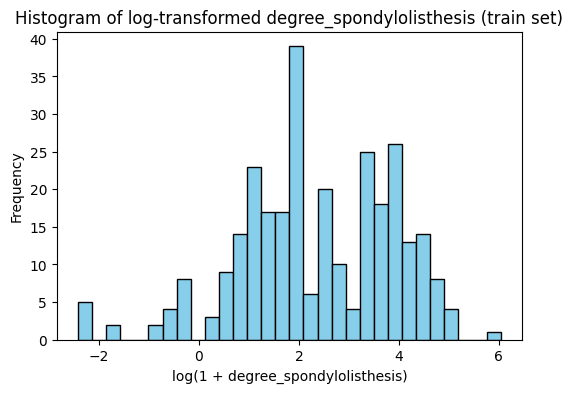

In [267]:
# Show histogram of log-transformed degree_spondylolisthesis (train set)
plt.figure(figsize=(6,4))
plt.hist(X_train[:, -1], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of log-transformed degree_spondylolisthesis (train set)')
plt.xlabel('log(1 + degree_spondylolisthesis)')
plt.ylabel('Frequency')
plt.show()

In [268]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [269]:
print(X_train)

[[-1.22106912  0.65687918 -0.98831308 -0.32151852         nan]
 [-1.30380255 -1.58148072 -0.96121661  0.68548006 -1.88490277]
 [-0.71320417 -0.82507476  0.24729773  1.34491891  0.66912397]
 ...
 [ 1.15479027  1.63339613  2.26725279 -1.08334072  1.06277336]
 [ 1.43725694  1.90063549  2.02558922  0.55081923  1.43945187]
 [-0.71914804 -0.29781666 -0.81406535  1.08415751         nan]]


In [270]:
print(X_test)

[[ 0.6697796   0.06568256  0.6848458  -0.70934309  0.74927827]
 [ 0.40469344  1.16594946  0.22607835 -0.41474912 -0.13835432]
 [ 2.12363755  0.85143572  1.9997308  -0.17078483  1.03562308]
 [ 0.98091344  0.05927607  0.24729773 -0.00654813  0.72947172]
 [-0.09598915 -0.52904718 -0.34364657 -0.14158163  0.87109903]
 [ 0.85028773 -0.3761406   0.74154205 -1.47455475  0.58902878]
 [-1.35910726 -1.30987369 -0.57780917  0.40726179 -1.63370367]
 [ 0.95029254  0.87285062  1.74475144 -1.05348906  1.07912852]
 [ 1.73263032  1.41882908  1.93160687  0.66572285  1.22555222]
 [ 0.78982223  0.22756345  1.53482361 -1.36612634 -1.86492413]
 [ 0.56095056  0.69904693  0.81579576  0.42317815         nan]
 [-0.66946424 -0.90737999 -0.31231973 -0.06297218 -1.3691041 ]
 [-0.79333406  0.31261137 -0.66597982  0.48571815         nan]
 [-0.4968325  -0.21368935 -0.63564382  0.41694691 -0.10124156]
 [-0.34166697 -1.15556632 -0.66597982 -0.23348327 -1.64608313]
 [ 1.70764924  1.50241438  0.97144548 -0.98051975  0.57

## Part 2 - Building the ANN

### Initializing the ANN

In [271]:
# For Jupyter or IPython notebooks, use !pip install
!pip install tensorflow

import tensorflow as tf

In [272]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [282]:
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))

### Adding the second hidden layer

In [283]:
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))

### Third Hidden Layer 

In [284]:
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))

### Adding the output layer

In [285]:
ann.add(tf.keras.layers.Dense(units=3, activation='softmax'))

## Part 3 - Training the ANN

### Compiling the ANN

In [286]:
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Training the ANN on the Training set

In [287]:
ann.fit(X_train, y_train, batch_size = 50, epochs = 80)

Epoch 1/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3534 - loss: 1.0987
Epoch 2/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3534 - loss: 1.0987
Epoch 2/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3401 - loss: 1.0983 
Epoch 3/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3401 - loss: 1.0983 
Epoch 3/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3104 - loss: 1.0990 
Epoch 4/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3104 - loss: 1.0990 
Epoch 4/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2916 - loss: 1.0993 
Epoch 5/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2916 - loss: 1.0993 
Epoch 5/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2994 - loss: 1.0991 
Epoch 6/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2994 - loss: 1.0991 
Epoch 6/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3407 - loss: 1.0987 
Epoch 7/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3407 - loss: 1.0987 
Epoch 

### Confusion Matrix

In [288]:
y_pred = ann.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_classes)
print(cm)
print("Accuracy:", accuracy_score(y_test, y_pred_classes))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
[[ 0 11  0]
 [ 0 20  0]
 [ 0 31  0]]
Accuracy: 0.3225806451612903
[[ 0 11  0]
 [ 0 20  0]
 [ 0 31  0]]
Accuracy: 0.3225806451612903


#### Mlflow Log

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  false negatives and false positives.
c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  false negatives and false positives.
c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  false negatives and false positives.
2025/07/26 20:26:19 WARNING mlflow.models.model: `ar

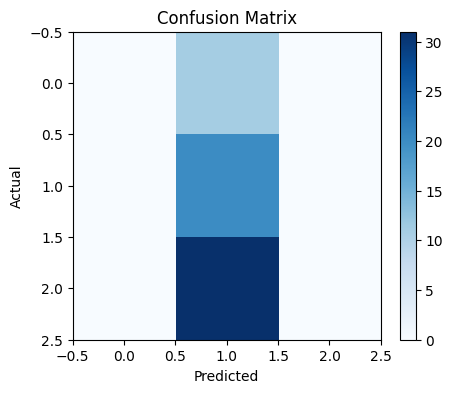

In [289]:
# Install MLflow if not available
!pip install mlflow

import mlflow
import mlflow.tensorflow

# Start an MLflow run
with mlflow.start_run():
    # Log model parameters
    mlflow.log_param("batch_size", 32)
    mlflow.log_param("epochs", 100)
    mlflow.log_param("optimizer", "adam")
    mlflow.log_param("loss_function", "sparse_categorical_crossentropy")
    mlflow.log_param("architecture", "Dense(6)-Dense(6)-Dense(6)-Dense(6)-Dense(3)")

    # Train the model
    history = ann.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.2, verbose=0)

    # Log metrics for last epoch
    mlflow.log_metric("train_accuracy", history.history["accuracy"][-1])
    mlflow.log_metric("val_accuracy", history.history["val_accuracy"][-1])
    mlflow.log_metric("train_loss", history.history["loss"][-1])
    mlflow.log_metric("val_loss", history.history["val_loss"][-1])

    # Log confusion matrix and classification report as artifacts
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix, classification_report
    import numpy as np

    y_pred = ann.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    cm = confusion_matrix(y_test, y_pred_classes)

    # Plot and save confusion matrix
    plt.figure(figsize=(5,4))
    plt.imshow(cm, cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.colorbar()
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")

    # Save classification report
    report = classification_report(y_test, y_pred_classes, target_names=le.classes_, output_dict=True)
    import json
    with open("classification_report.json", "w") as f:
        json.dump(report, f)
    mlflow.log_artifact("classification_report.json")

    # Log the trained model
    mlflow.tensorflow.log_model(ann, "model")